In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\aarza\Desktop\Dataset\imarticus\linear reg\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

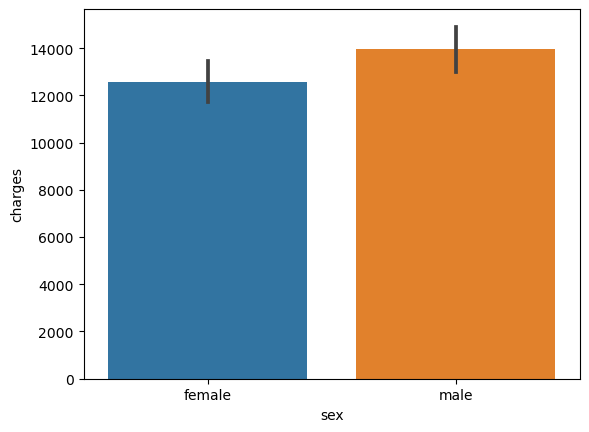

In [6]:
sn.barplot(x = 'sex', y = 'charges', data = df);

we can say that male gender have more charges than female

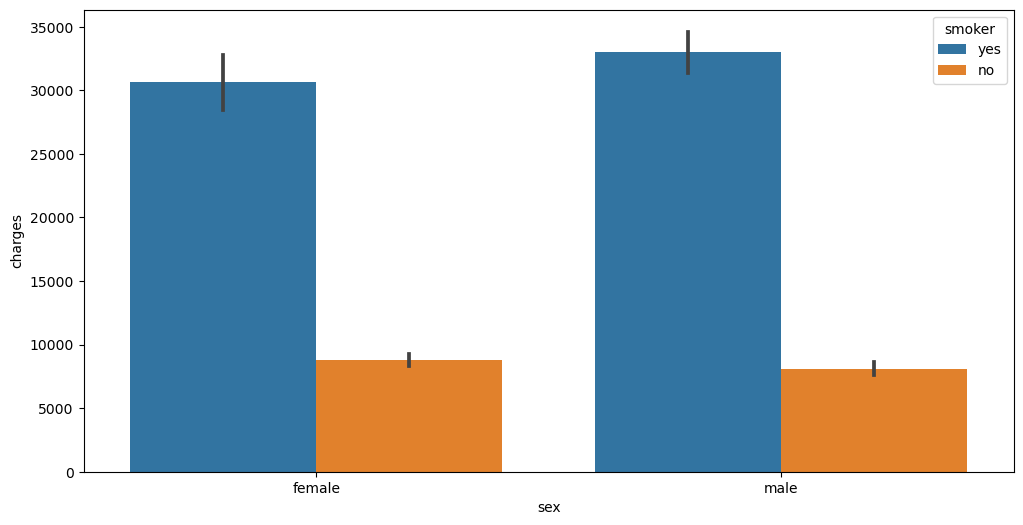

In [7]:
plt.figure(figsize=(12, 6))
(sn.barplot(x = 'sex',
            y = 'charges', 
            hue = 'smoker', 
            data = df));

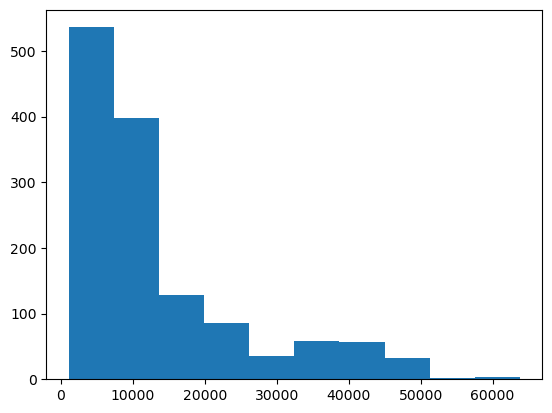

In [8]:
plt.hist(df['charges']);

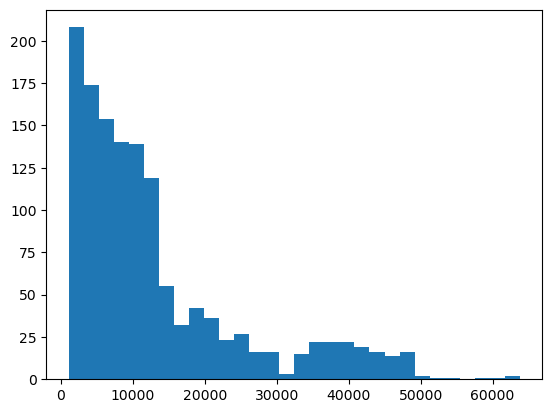

In [9]:
plt.hist(df['charges'],bins=30);

C:\Users\aarza\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


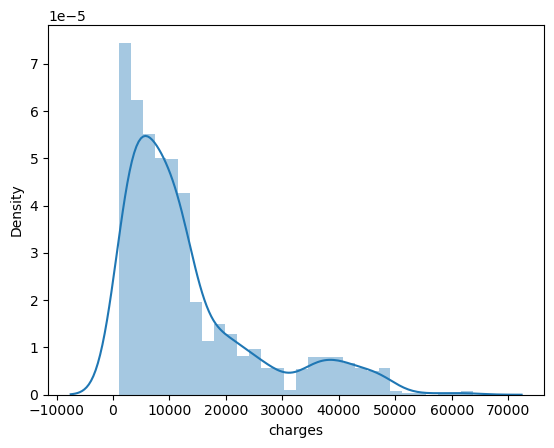

In [10]:
sn.distplot(df['charges']);

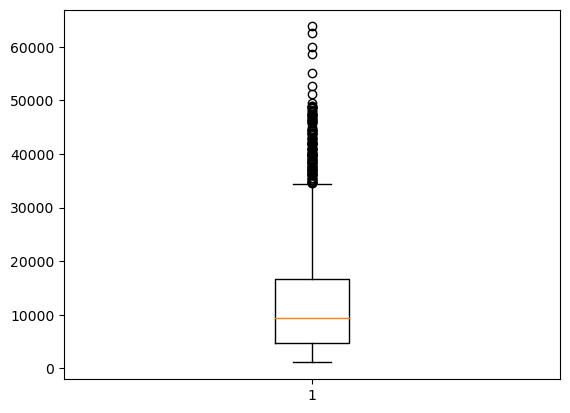

In [11]:
box = plt.boxplot(df['charges']);

In [12]:
[item.get_ydata()[0] for item in box['caps']]

[1121.8739, 34472.841]

In [13]:
[item.get_ydata()[0] for item in box['whiskers']]

[4740.28715, 16639.912515]

In [14]:
outliers_df=df[df['charges'] > 34472.841]

In [15]:
outliers_df

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


so 139 records are outliers in data

In [16]:
df=df[df['charges'] < 34472.841]

In [17]:
df.shape

(1198, 7)

C:\Users\aarza\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


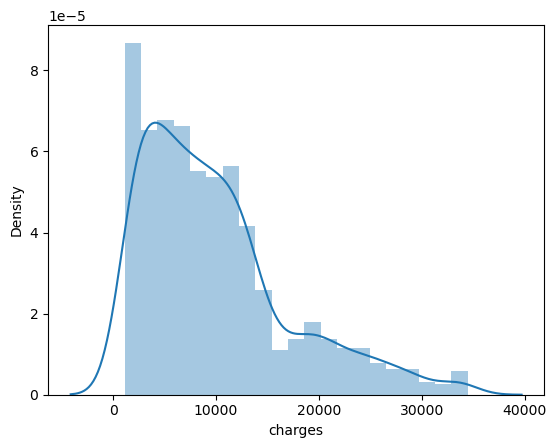

In [18]:
sn.distplot(df['charges']);

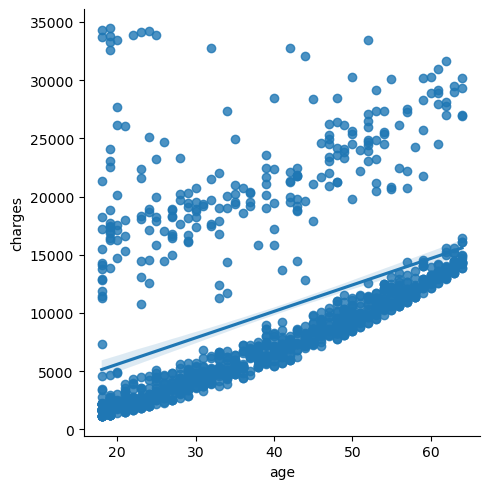

In [19]:
sn.lmplot( x = 'age', 
            y = 'charges', 
            data = df );

C:\Users\aarza\anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


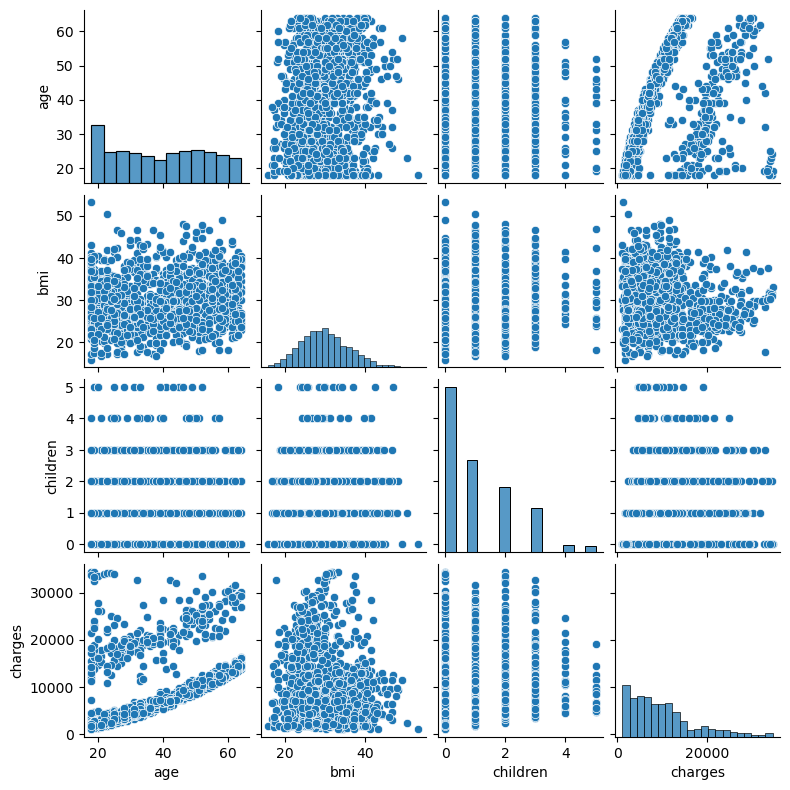

In [20]:
sn.pairplot(df, size=2)

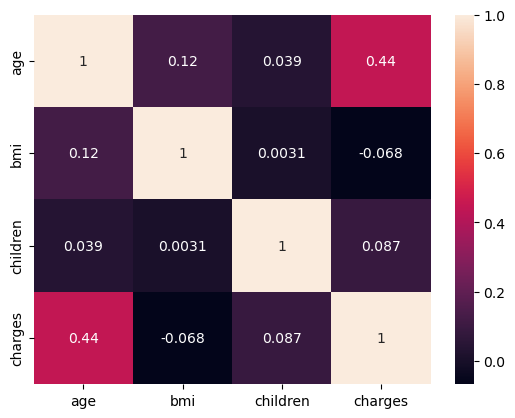

In [21]:
sn.heatmap(df.corr(), annot=True);

In [22]:
X_features = list(df.columns)
X_features.remove('charges')
X_features

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [23]:
encoded_df = pd.get_dummies(df[X_features],drop_first = True )

In [24]:
encoded_df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [25]:
Y = df.charges
X = encoded_df

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
insurance_lm=model.fit(X_train,y_train)

In [31]:
print(insurance_lm.intercept_)
print(insurance_lm.coef_)

-3190.646131539812
[  245.89098894    71.19633081   392.4755508   -819.62529395
 15354.93907628  -142.42900134  -507.84805668 -1274.71010599]


In [32]:
y_pred=model.predict(X_test)

In [33]:
print("Predicted values: ",y_pred)

Predicted values:  [ 2823.81005161  5140.10717168 21168.98460113  3020.99564624
 20606.4819498  27423.36770584  9558.13782968  4698.85880135
 15551.77050684 10653.31204415  8704.22192411  9722.61380826
  9688.39936248  2128.97740278 10631.44883492  3461.74879653
   860.71130627 27088.05456357 12541.73061691 26312.5255035
  1743.54580836   832.23277394 25194.7152549   4003.73231939
 17576.36779069 10434.72685415  7208.76355753  8912.71380539
 13113.15157169  9199.48717185  7008.71716613 19202.14524601
  9148.69573523 10215.90289527  5880.89352912  2304.38681398
  3455.5257948  10600.19989608 11441.91093989  9344.27552498
 24929.21229973 11815.85155936 12140.94178912 14750.93520472
 10143.18066924  5896.57640801 10814.48218919 13944.05346867
 24258.69782762  2771.89182439  3498.50445115 28265.46770656
  3841.40468514  9271.05052556 10297.09020804 15725.45231428
 10960.88259612 11576.64665167 24925.91133573  3311.83265761
  6613.44588914  7957.85812278  7967.02131176  5179.1168253
 12728.

In [34]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

4962.704075800777

In [35]:
from sklearn.metrics import r2_score

In [36]:
np.abs(r2_score(y_test, y_pred))

0.5691957660340533

statsmodel

In [37]:
import statsmodels.api as sm

In [38]:
X = sm.add_constant(encoded_df)
Y = df['charges']

train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 42 )

In [39]:
model = sm.OLS(train_y, train_X).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.610     
Dependent Variable:   charges            AIC:                  18782.1644
Date:                 2023-04-20 22:17   BIC:                  18825.9481
No. Observations:     958                Log-Likelihood:       -9382.1   
Df Model:             8                  F-statistic:          187.8     
Df Residuals:         949                Prob (F-statistic):   1.19e-189 
R-squared:            0.613              Scale:                1.8970e+07
-------------------------------------------------------------------------
                   Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const            -3114.5536 853.5371 -3.6490 0.0003 -4789.5920 -1439.5153
age                245.5738  10.2363 23.9905 0.0000   225.4854   265.6623
bmi                 66.5613  25.0589  2.6562 0.0080    17.3841   115.7385
children           378.6239 117.2874  3.2282 0.0013   148.4512   608.7965
sex_male          -590.1633 282.4623 -2.0894 0.0369 -1144.4861   -35.8405
smoker_yes       14907.3028 480.4353 31.0287 0.0000 13964.4644 15850.1412
region_northwest     0.0621 400.5416  0.0002 0.9999  -785.9876   786.1118
region_southeast  -769.4478 411.4427 -1.8701 0.0618 -1576.8905    37.9949
region_southwest -1205.1564 407.6669 -2.9562 0.0032 -2005.1891  -405.1237
-------------------------------------------------------------------------
Omnibus:               625.870         Durbin-Watson:            1.991   
Prob(Omnibus):         0.000           Jarque-Bera (JB):         4733.233
Skew:                  3.106           Prob(JB):                 0.000   
Kurtosis:              11.943          Condition No.:            315     
=========================================================================

"""

In [40]:
#Durbin-Watson: auto correlation ----> close 2 which means there is no correlation between independent variables 
#Jarque-Bera (JB): error or y following normal distribution -----> as close to 0
#Adj. R-squared: variation in y with change in x----> 61% of data explain by x ----> means 29% error
# model significant -- model data is significant for regression  (f-test) 1.19e-189 < 0.05(alpha)

In [41]:
print(model.params )

const               -3114.553629
age                   245.573836
bmi                    66.561279
children              378.623856
sex_male             -590.163312
smoker_yes          14907.302829
region_northwest        0.062064
region_southeast     -769.447795
region_southwest    -1205.156420
dtype: float64


In [42]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [43]:
significant_vars = get_significant_vars(model)
significant_vars

['const',
 'age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_southwest']

In [44]:
model = sm.OLS(train_y, train_X[significant_vars]).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.608     
Dependent Variable:   charges            AIC:                  18782.9097
Date:                 2023-04-20 22:17   BIC:                  18816.9636
No. Observations:     958                Log-Likelihood:       -9384.5   
Df Model:             6                  F-statistic:          248.9     
Df Residuals:         951                Prob (F-statistic):   4.95e-191 
R-squared:            0.611              Scale:                1.9024e+07
-------------------------------------------------------------------------
                   Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const            -2994.1195 833.3515 -3.5929 0.0003 -4629.5397 -1358.6992
age                246.7610  10.2300 24.1214 0.0000   226.6851   266.8370
bmi                 51.6312  24.1283  2.1399 0.0326     4.2803    98.9821
children           388.8297 117.3589  3.3132 0.0010   158.5173   619.1421
sex_male          -569.6011 282.7056 -2.0148 0.0442 -1124.4001   -14.8021
smoker_yes       14873.1321 480.5037 30.9532 0.0000 13930.1620 15816.1021
region_southwest  -940.8970 328.9194 -2.8606 0.0043 -1586.3887  -295.4052
-------------------------------------------------------------------------
Omnibus:               625.531         Durbin-Watson:            1.986   
Prob(Omnibus):         0.000           Jarque-Bera (JB):         4749.240
Skew:                  3.102           Prob(JB):                 0.000   
Kurtosis:              11.972          Condition No.:            305     
=========================================================================

"""

In [45]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Checking Normality

<Figure size 800x600 with 0 Axes>

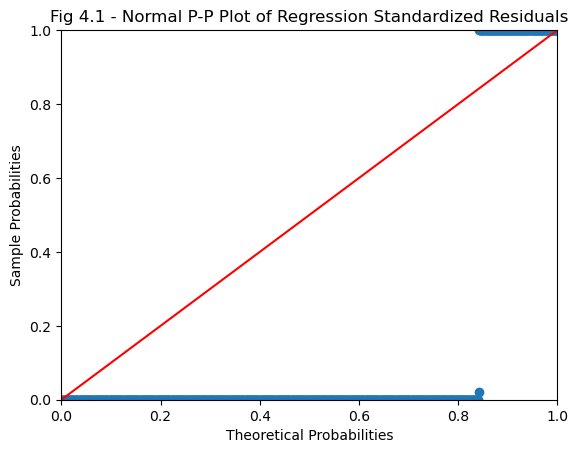

In [46]:
model_resid = model.resid # y-^y
probplot = sm.ProbPlot( model_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [47]:
def get_standardized_values( vals ):    
    return (vals - vals.mean())/vals.std()

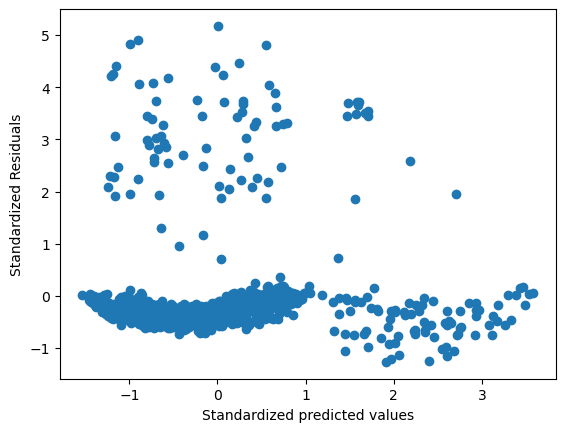

In [48]:
plt.scatter( get_standardized_values( model.fittedvalues ), # ^y
            get_standardized_values( model_resid ) )           # e
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [49]:
from scipy.stats import zscore

In [50]:
df['z_score'] = zscore( df.charges )

In [51]:
df=df[ (df.z_score < 3.0) | (df.z_score > -3.0) ]
df

,age,sex,bmi,children,smoker,region,charges,z_score
0,19,female,27.900,0,yes,southwest,16884.92400,0.968269
1,18,male,33.770,1,no,southeast,1725.55230,-1.135352
2,28,male,33.000,3,no,southeast,4449.46200,-0.757363
3,33,male,22.705,0,no,northwest,21984.47061,1.675918
4,32,male,28.880,0,no,northwest,3866.85520,-0.838210
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.096205
1334,18,female,31.920,0,no,northeast,2205.98080,-1.068685
1335,18,female,36.850,0,no,southeast,1629.83350,-1.148635
1336,21,female,25.800,0,no,southwest,2007.94500,-1.096165


In [52]:
X_features = list(df.columns)
X_features=X_features[0:6]
X_features

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [53]:
encoded_df = pd.get_dummies(df[X_features],drop_first = True )

In [55]:
X = sm.add_constant(encoded_df))
Y = df['charges']
train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 42 )

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [ ]:
model = sm.OLS(train_y, train_X.fit()
model.summary2()

In [ ]:
significant_vars = get_significant_vars(model)
significant_vars

In [ ]:
model = sm.OLS(train_y, train_X[significant_vars]).fit()
model.summary2()

In [ ]:
pred_y = model.predict( test_X[significant_vars])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
np.abs(r2_score(test_y, pred_y))

In [ ]:
np.sqrt(mean_squared_error(test_y, pred_y))